In [1]:
# Import the main libraries
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [31]:
df = pd.read_csv('BreastCancerData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### We can obseve that the last column is composed by null numbers, so we can drop it. But first lets check the rest of the columns in order to see if we need to fill the missing values:

In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### Since the null numbers are only in the last column, we can finally drop it. Moreover, the 'id' colunm does not provide us with useful information, so we can also drop it

In [33]:
df = df.drop(['Unnamed: 32', 'id'], axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### The next we can see is that the target column 'diagnosis' has categorical values, so we have to transform them into numerical data

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Train/test split

In [73]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Standarisation of the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

## Model Selection

#### We can try to apply different classification algorithms such as Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Naive Bayes, Decision Tree, Random Forest or XGBoost

## Logistic Regresion

In [75]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

LogisticRegression()

Accuracy Score (Logistic Regression model): 97.36842105263158 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

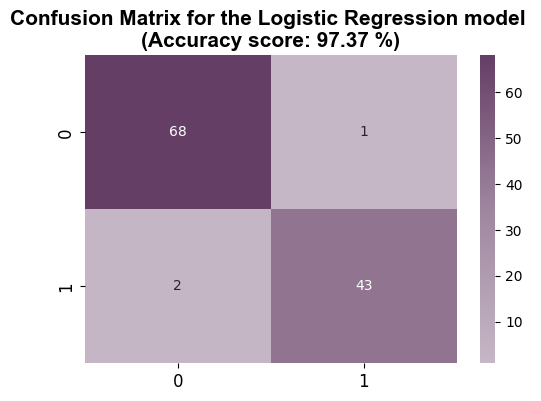

In [77]:
lr_ypred = classifier_lr.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy Score (Logistic Regression model):", accuracy_score(y_test, lr_ypred)*100, "%") # Print the accuracy score for the predictions

cm_lr = confusion_matrix(y_test, lr_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Logistic Regression model \n(Accuracy score: {accuracy_score(y_test, lr_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## K-Nearest Neighbors

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

classifier_kn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Initialise a standard KNN classifier

param_grid = {'n_neighbors': range(1,21)}  # Define the range of neighbors to test
grid_search = GridSearchCV(estimator = classifier_kn, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
optimal_neighbors = grid_search.best_params_['n_neighbors']  # extract the optimal number of neighbors
best_score = grid_search.best_score_
print(f"Optimal number of neighbors: {optimal_neighbors}")
print(f"Best cross-validation accuracy: {best_score}")

classifier_kn = KNeighborsClassifier(n_neighbors = optimal_neighbors, metric = 'minkowski', p = 2) # Redo the KNN clasiffier with optimal neighbors
classifier_kn.fit(X_train, y_train)

Optimal number of neighbors: 9
Best cross-validation accuracy: 0.9714285714285713


KNeighborsClassifier(n_neighbors=9)

Accuracy Score (K-Nearest Neighbors model): 94.73684210526315 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

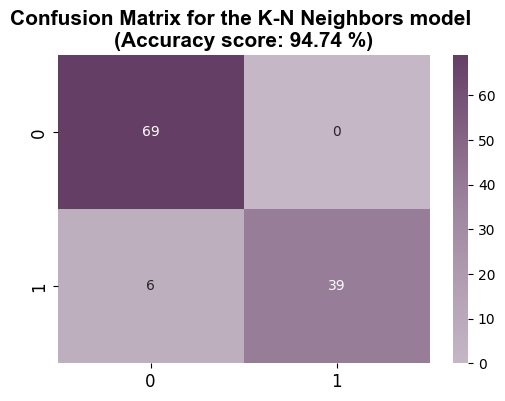

In [81]:
kn_ypred = classifier_kn.predict(X_test)

print("Accuracy Score (K-Nearest Neighbors model):", accuracy_score(y_test, kn_ypred)*100, "%") # Print the accuracy score for the predictions

cm_kn = confusion_matrix(y_test, kn_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_kn, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the K-N Neighbors model \n(Accuracy score: {accuracy_score(y_test, kn_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Support Vector Machine

In [83]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 19)
classifier_svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=19)

Accuracy Score (Support Vector Machine model): 95.6140350877193 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

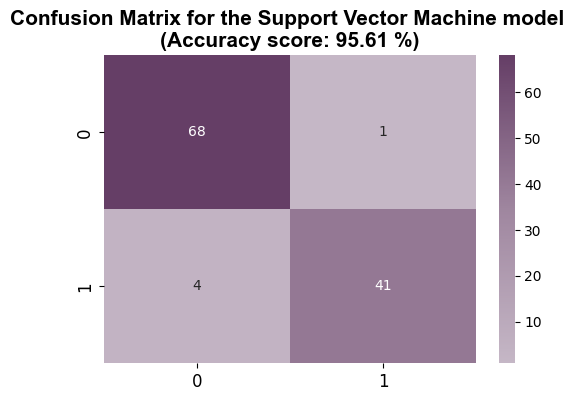

In [85]:
svc_ypred = classifier_svc.predict(X_test)

print("Accuracy Score (Support Vector Machine model):", accuracy_score(y_test, svc_ypred)*100, "%") # Print the accuracy score for the predictions

cm_svc = confusion_matrix(y_test, svc_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Support Vector Machine model \n(Accuracy score: {accuracy_score(y_test, svc_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Naive Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

Accuracy Score (Naive Bayes model): 91.22807017543859 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

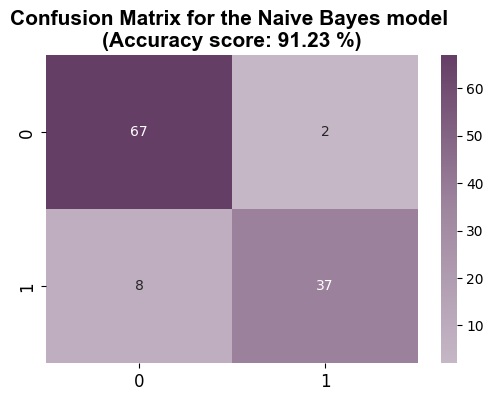

In [89]:
nb_ypred = classifier_nb.predict(X_test)

print("Accuracy Score (Naive Bayes model):", accuracy_score(y_test, nb_ypred)*100, "%") # Print the accuracy score for the predictions

cm_nb = confusion_matrix(y_test, nb_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Naive Bayes model \n(Accuracy score: {accuracy_score(y_test, nb_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Accuracy Score (Decision Tree model): 90.35087719298247 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

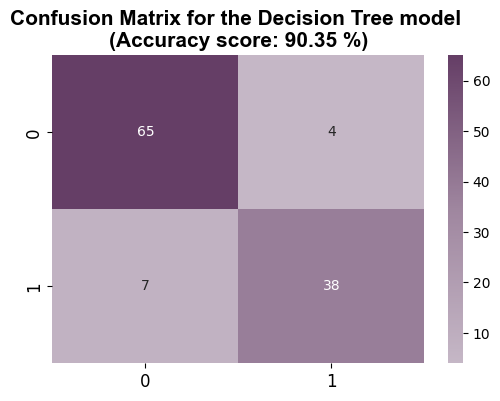

In [93]:
dt_ypred = classifier_dt.predict(X_test)

print("Accuracy Score (Decision Tree model):", accuracy_score(y_test, dt_ypred)*100, "%") # Print the accuracy score for the predictions

cm_dt = confusion_matrix(y_test, dt_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Decision Tree model \n(Accuracy score: {accuracy_score(y_test, dt_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Accuracy Score (Random Forest model): 91.22807017543859 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

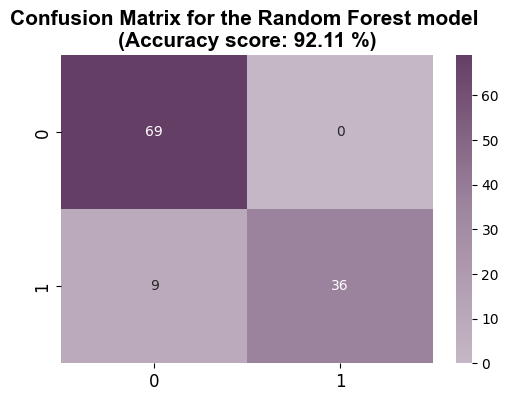

In [97]:
rf_ypred = classifier_rf.predict(X_test)

print("Accuracy Score (Random Forest model):", accuracy_score(y_test, nb_ypred)*100, "%") # Print the accuracy score for the predictions

cm_rf = confusion_matrix(y_test, rf_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Random Forest model \n(Accuracy score: {accuracy_score(y_test, rf_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## XGBoost

In [99]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Score (XGBoost model): 96.49122807017544 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

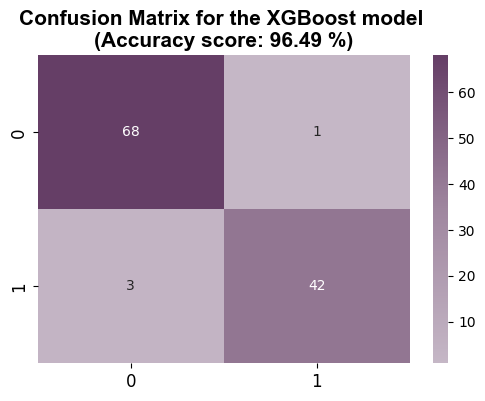

In [101]:
xg_ypred = classifier_xg.predict(X_test)

print("Accuracy Score (XGBoost model):", accuracy_score(y_test, xg_ypred)*100, "%") # Print the accuracy score for the predictions

cm_xg = confusion_matrix(y_test, xg_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xg, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the XGBoost model \n(Accuracy score: {accuracy_score(y_test, xg_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Models performance

#### We can observe that the majority of the models present a real good performance, being the best one the Logistic Regression model

In [104]:
print('=='*15)
print('Model: Logistic Regression')
print(f'Accuracy score: {accuracy_score(y_test, lr_ypred)*100:.2f} %')

print('=='*15)
print('Model: K-Nearest Neighbors')
print(f'Accuracy score: {accuracy_score(y_test, kn_ypred)*100:.2f} %')

print('=='*15)
print('Model: Support Vector Machine')
print(f'Accuracy score: {accuracy_score(y_test, svc_ypred)*100:.2f} %')

print('=='*15)
print('Model: Naive Bayes')
print(f'Accuracy score: {accuracy_score(y_test, nb_ypred)*100:.2f} %')

print('=='*15)
print('Model: Decision Tree')
print(f'Accuracy score: {accuracy_score(y_test, dt_ypred)*100:.2f} %')

print('=='*15)
print('Model: Random Forest')
print(f'Accuracy score: {accuracy_score(y_test, rf_ypred)*100:.2f} %')

print('=='*15)
print('Model: XGBoost')
print(f'Accuracy score: {accuracy_score(y_test, xg_ypred)*100:.2f} %')

Model: Logistic Regression
Accuracy score: 97.37 %
Model: K-Nearest Neighbors
Accuracy score: 94.74 %
Model: Support Vector Machine
Accuracy score: 95.61 %
Model: Naive Bayes
Accuracy score: 91.23 %
Model: Decision Tree
Accuracy score: 90.35 %
Model: Random Forest
Accuracy score: 92.11 %
Model: XGBoost
Accuracy score: 96.49 %
